<a href="https://colab.research.google.com/github/ymamathasai/DSDM-725/blob/main/Lab%202%20/%20Lab2_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [ ]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
df_new = df.values.T[1]

In [ ]:
def bootstrap_mean(x, sample_size, n):
	# <---INSERT YOUR CODE HERE--->
  boot_strapping = np.random.choice(x, replace= True, size= [n, sample_size])  
  meanBootstapSamples = []
  # Create an array of mean of all bootstrap samples
  for singleSample in boot_strapping:
    singleSampleMean = singleSample.mean()
    meanBootstapSamples.append(singleSampleMean)

  meanBootstapSamplesArray = np.array(meanBootstapSamples)  

  # Mean of array of all means of bootstrap samples
  data_mean = meanBootstapSamplesArray.mean() 
  
  # Lower and upper mean values in mean of bootstrap arrays
  lower, upper = np.percentile(meanBootstapSamplesArray, [2.5, 97.5])
  return data_mean, lower, upper


bootstrap_mean(df_new, df_new.shape[0], 10)
	


(8.614285714285714, 7.017857142857142, 10.285714285714286)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

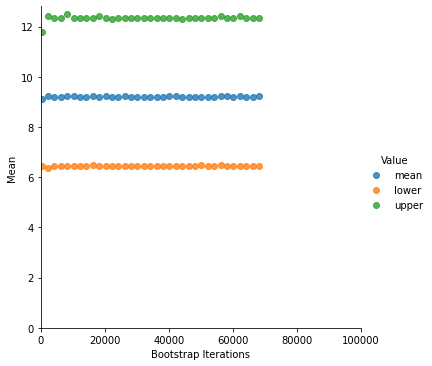

In [ ]:
boots_ = []
for i in range(200, 70000, 2000):
    boot_ = bootstrap_mean(df_new, df_new.shape[0], i)
    boots_.append([i, boot_[0], "mean"])
    boots_.append([i, boot_[1], "lower"])
    boots_.append([i, boot_[2], "upper"])

df_boot = pd.DataFrame(boots_, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [ ]:
def bootstrap_mean_ci(sample, sample_size, n, ci):
 # Create bootstrap samples from given dataset
  boot_strapping = np.random.choice(sample, replace= True, size= [n, sample_size])  
  meanBootstapSamples = []
  # Create an array of mean of all bootstrap samples
  for singleSample in boot_strapping:
    singleSampleMean = singleSample.mean()
    meanBootstapSamples.append(singleSampleMean)
    
  meanBootstapSamplesArray = np.array(meanBootstapSamples)  

  # Mean of array of all means of bootstrap samples
  data_mean = meanBootstapSamplesArray.mean() 
  
  # Lower and upper mean values in mean of bootstrap arrays
  lower, upper = np.percentile(meanBootstapSamplesArray, [(100-ci)/2, ci + (100-ci)/2])

  return data_mean, lower, upper

bootstrap_mean_ci(df_new, df_new.shape[0], 10, 80)

(8.864285714285714, 7.135714285714286, 9.92142857142857)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 100000.0)

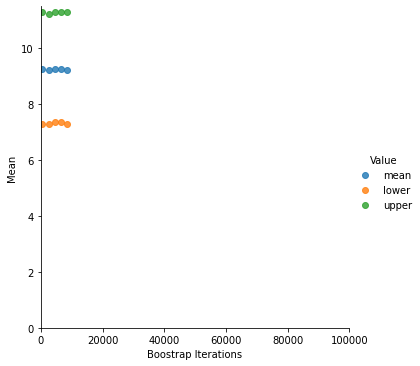

In [ ]:
boots_ = []
for i in range(500, 10000, 2000):
    boot_ = bootstrap_mean_ci(df_new, df_new.shape[0], i, 80)
    boots_.append([i, boot_[0], "mean"])
    boots_.append([i, boot_[1], "lower"])
    boots_.append([i, boot_[2], "upper"])

df_boot = pd.DataFrame(boots_, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

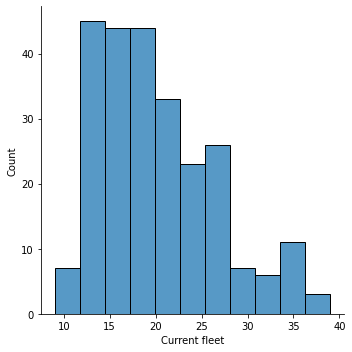

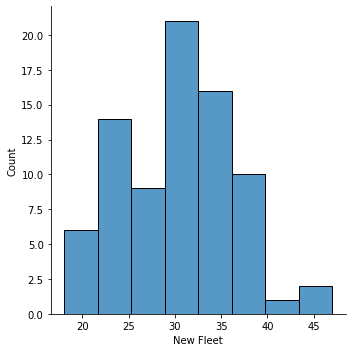

In [ ]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")


# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# Github vehicle dataset
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')

# current fleet dataset
current_Fleet = df.values.T[0]
# new fleet dataset
new_Fleet = df.values.T[1]
# Removing null values from new fleet dataset
new_Fleet= new_Fleet[np.logical_not(np.isnan(new_Fleet))]

# Plotting Current fleet using seaborn histogram
sns.displot(data=df, x='Current fleet')

# sns.scatterplot(data=df, col='Current fleet')

# Plotting new fleet using seaborn histogram
sns.displot(data=df, x='New Fleet')
# sns.scatterplot(data=df, x='New Fleet')



## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [ ]:
# <---INSERT YOUR CODE HERE--->

from mlxtend.evaluate import permutation_test

# Current fleet Mean
currentMean = np.mean(current_Fleet)

# New fleet Mean
newMean = np.mean(new_Fleet)

tObserved = newMean - currentMean

currentSet = bootstrap_mean_ci(current_Fleet, current_Fleet.shape[0], 10, 95)

newSet = bootstrap_mean_ci(new_Fleet, new_Fleet.shape[0], 10, 95)

differenceConfInt = newSet[0] - currentSet[0]

concate = np.concatenate((current_Fleet,new_Fleet))

numberOfTimes = 0
n_permutations = 20000
for i in range(n_permutations):
  # Performing Permutation
  perm = np.random.permutation(concate)

  
  p_Current_Fleet = perm[:len(current_Fleet)]
  
  p_New_Fleet = perm[-len(new_Fleet):]

  
  pCurrentFleetMean = p_Current_Fleet.mean()

  
  pNewFleetMean = p_New_Fleet.mean()

  
  tperm = pNewFleetMean - pCurrentFleetMean

  if tperm>tObserved:
    numberOfTimes += 1

pValue = (numberOfTimes)/(n_permutations)
print('pValue : ', pValue)


pValue :  0.0


In [ ]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    # Mean of the two arrays
    sample1Mean = sample1.mean()
    sample2Mean = sample2.mean()

    # Difference in mean
    tObservation = sample2Mean - sample1Mean

    concate = np.concatenate((sample1,sample2))

    numberOfTimes = 0

    for i in range(n_permutations):
      perm = np.random.permutation(concate)

      pSample1 = perm[:len(sample1)]
      pSample2 = perm[-len(sample2):]

      pSample1Mean = pSample1.mean()
      pSample2Mean = pSample2.mean()

      tperm = pSample2Mean - pSample1Mean
      if (np.float64(tperm) > np.float64(tObservation)):        
        numberOfTimes = numberOfTimes + 1

    pvalue = numberOfTimes/n_permutations

    return pvalue

# Testing    
a = np.array([5, 1, 2, 1, 18, 4])
b = np.array([5, 1, 2, 1, 9, 12])
permut_test(a, b, 50000)
# permut_test(currentFleet, newFleet, 50000)


0.50058